In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
seaborn.set()
from collections import Counter
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('EXL_EQ_2023_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223584 entries, 0 to 223583
Data columns (total 45 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   PM2.5                                             218044 non-null  float64
 1   NO                                                218735 non-null  float64
 2   NO2                                               218244 non-null  float64
 3   NOx                                               217612 non-null  float64
 4   NH3                                               217948 non-null  float64
 5   SO2                                               219700 non-null  float64
 6   CO                                                219762 non-null  float64
 7   Ozone                                             219154 non-null  float64
 8   Benzene                                           217487 non-null  float64
 9   Tolu

In [3]:
df.describe()

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,Latitude,Longitude,Total Length of Roads as of 2019(Km),Length of National Highways as of 2022(Km),Railway Route as of 2021(Km),Forest Cover as of 2021(sq Km),Number of Factories as of 2020 (Units),Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),DIESEL/HYBRID
count,218044.000000,218735.000000,218244.000000,217612.000000,217948.000000,219700.000000,219762.000000,219154.000000,217487.000000,167030.000000,...,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000
mean,69.213957,14.072135,30.366790,30.736544,26.234892,13.945535,0.987377,31.138962,3.730146,19.040600,...,24.619147,80.321382,286961.117647,7288.029412,4573.882353,21637.235294,11424.088235,20314.823529,5.938235,58.750295
std,56.962718,22.097622,31.883841,31.688403,20.545715,10.851849,0.792493,21.908442,5.709067,24.739317,...,5.056692,5.417350,159073.751285,4531.545100,3094.274920,19508.426850,8986.112066,13297.869679,0.933690,94.245640
min,0.100000,0.010000,0.010000,0.000000,0.100000,0.010000,0.000000,0.030000,0.000000,0.000000,...,8.486000,72.587000,2573.000000,15.000000,13.000000,23.000000,204.000000,225.000000,3.600000,0.000000
25%,30.340937,4.006669,12.175122,13.329495,13.053931,6.357942,0.476443,14.784502,0.872648,2.444047,...,23.026000,77.026000,120034.000000,3620.000000,1703.000000,14818.000000,3892.000000,7323.000000,5.500000,1.000000
50%,51.630955,6.727626,19.174929,21.085326,20.984008,11.360059,0.821914,27.112538,2.198147,8.847500,...,25.519500,78.095000,298205.000000,7257.000000,4212.000000,14872.000000,9694.000000,25385.000000,6.100000,13.000000
75%,91.310000,13.334686,36.976778,35.779768,33.487317,18.810202,1.213776,42.196887,4.028444,23.859738,...,28.411000,83.010000,442907.000000,12245.000000,8799.000000,23659.000000,16184.000000,29230.000000,6.500000,46.000000
max,890.873920,359.241357,300.479696,394.141771,412.902722,195.550000,9.472610,197.200000,205.880300,360.394123,...,34.086000,93.944000,636887.000000,18317.000000,8799.000000,77493.000000,38837.000000,43446.000000,7.900000,457.000000


In [4]:
df.shape

(223584, 45)

In [5]:
df.isnull().sum(axis = 0)

PM2.5                                                 5540
NO                                                    4849
NO2                                                   5340
NOx                                                   5972
NH3                                                   5636
SO2                                                   3884
CO                                                    3822
Ozone                                                 4430
Benzene                                               6097
Toluene                                              56554
Temp                                                172116
RH                                                   27211
WS                                                    7080
WD                                                    5809
SR                                                   16383
BP                                                   64451
AT                                                   215

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df.drop(['CH4', 'O Xylene', 'VWS', 'Temp'], axis=1, inplace=True)

In [8]:
df[['ELECTRIC(BOV)','DIESEL','CNG ONLY','PETROL','PETROL/CNG','PETROL/HYBRID']] = df[['ELECTRIC(BOV)','DIESEL','CNG ONLY','PETROL','PETROL/CNG','PETROL/HYBRID']].replace('[\","\,\.]', '', regex=True).astype(float)

In [9]:
q1=df['PM2.5'].quantile(0.25)
q3=df['PM2.5'].quantile(0.75)
IQR=q3-q1


In [10]:
IQR

60.969062591258634

In [11]:
lower_lim=q1-1.5*IQR
upper_lim=q3+1.5*IQR

In [12]:
lower_lim

-61.112656478146576

In [13]:
upper_lim

182.76359388688795

In [14]:
from scipy.stats.mstats import winsorize

In [15]:
df['PM2.5']=winsorize(df['PM2.5'], (0.01,0.04))

In [16]:
df['PM2.5'].quantile(0.96)

243.13159600883043

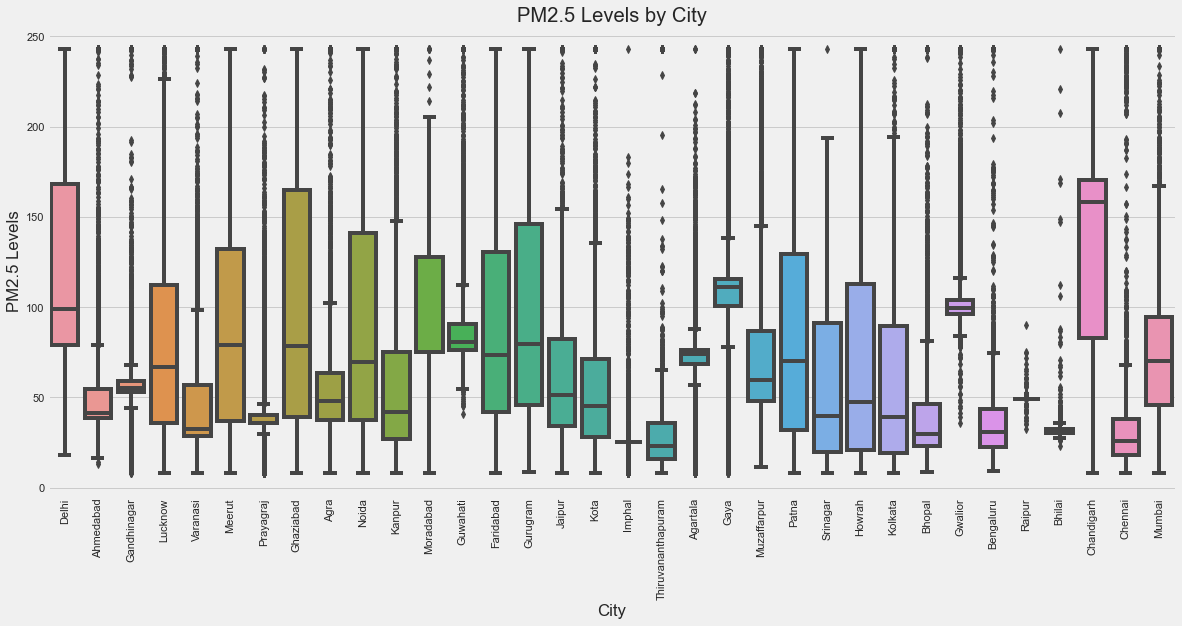

In [17]:
seaborn.boxplot(x='City', y='PM2.5', data=df)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('PM2.5 Levels')
plt.title('PM2.5 Levels by City')
plt.show()

In [18]:
df['CO']=winsorize(df['CO'], (0.01,0.02))
df['NOx']=winsorize(df['NOx'], (0.01,0.02))
df['NO2']=winsorize(df['NO2'], (0.01,0.02))
df['NO']=winsorize(df['NO'], (0.01,0.02))
df['NH3']=winsorize(df['NH3'], (0.01,0.02))
df['AT']=winsorize(df['AT'], (0.01,0.02))
df['BP']=winsorize(df['BP'], (0.01,0.02))
df['RF']=winsorize(df['RF'], (0.01,0.02))

In [19]:
df['CNG ONLY']=winsorize(df['CNG ONLY'], (0.01,0.02))

In [20]:
df=df.sort_values('City')

In [21]:
df.fillna(method='bfill', inplace=True)
df.isnull().sum(axis = 0)

PM2.5                                               0
NO                                                  0
NO2                                                 0
NOx                                                 0
NH3                                                 0
SO2                                                 0
CO                                                  0
Ozone                                               0
Benzene                                             0
Toluene                                             0
RH                                                  0
WS                                                  0
WD                                                  0
SR                                                  0
BP                                                  0
AT                                                  0
RF                                                  0
TOT-RF                                              0
Eth-Benzene                 

Feature Correlation

In [22]:
df.index = pd.to_datetime(df['Time Periods'] )
df.drop(['Time Periods'],axis=1, inplace = True)
df=df.rename(columns= {
    'PM2.5':'PM25'
}) 

In [23]:
corr_matrix = df.corr()
print(corr_matrix["PM25"].sort_values(ascending=False))

PM25                                                1.000000
CO                                                  0.496486
NOx                                                 0.388021
NO2                                                 0.384323
NO                                                  0.353900
Latitude                                            0.290705
NH3                                                 0.283073
Benzene                                             0.142005
BP                                                  0.118181
Toluene                                             0.115716
RF                                                  0.102117
SO2                                                 0.090697
Xylene                                              0.066846
PETROL/CNG                                          0.057567
Population as of 2021 (Estimated)                   0.052902
WD                                                  0.031515
CNG ONLY                

<AxesSubplot:>

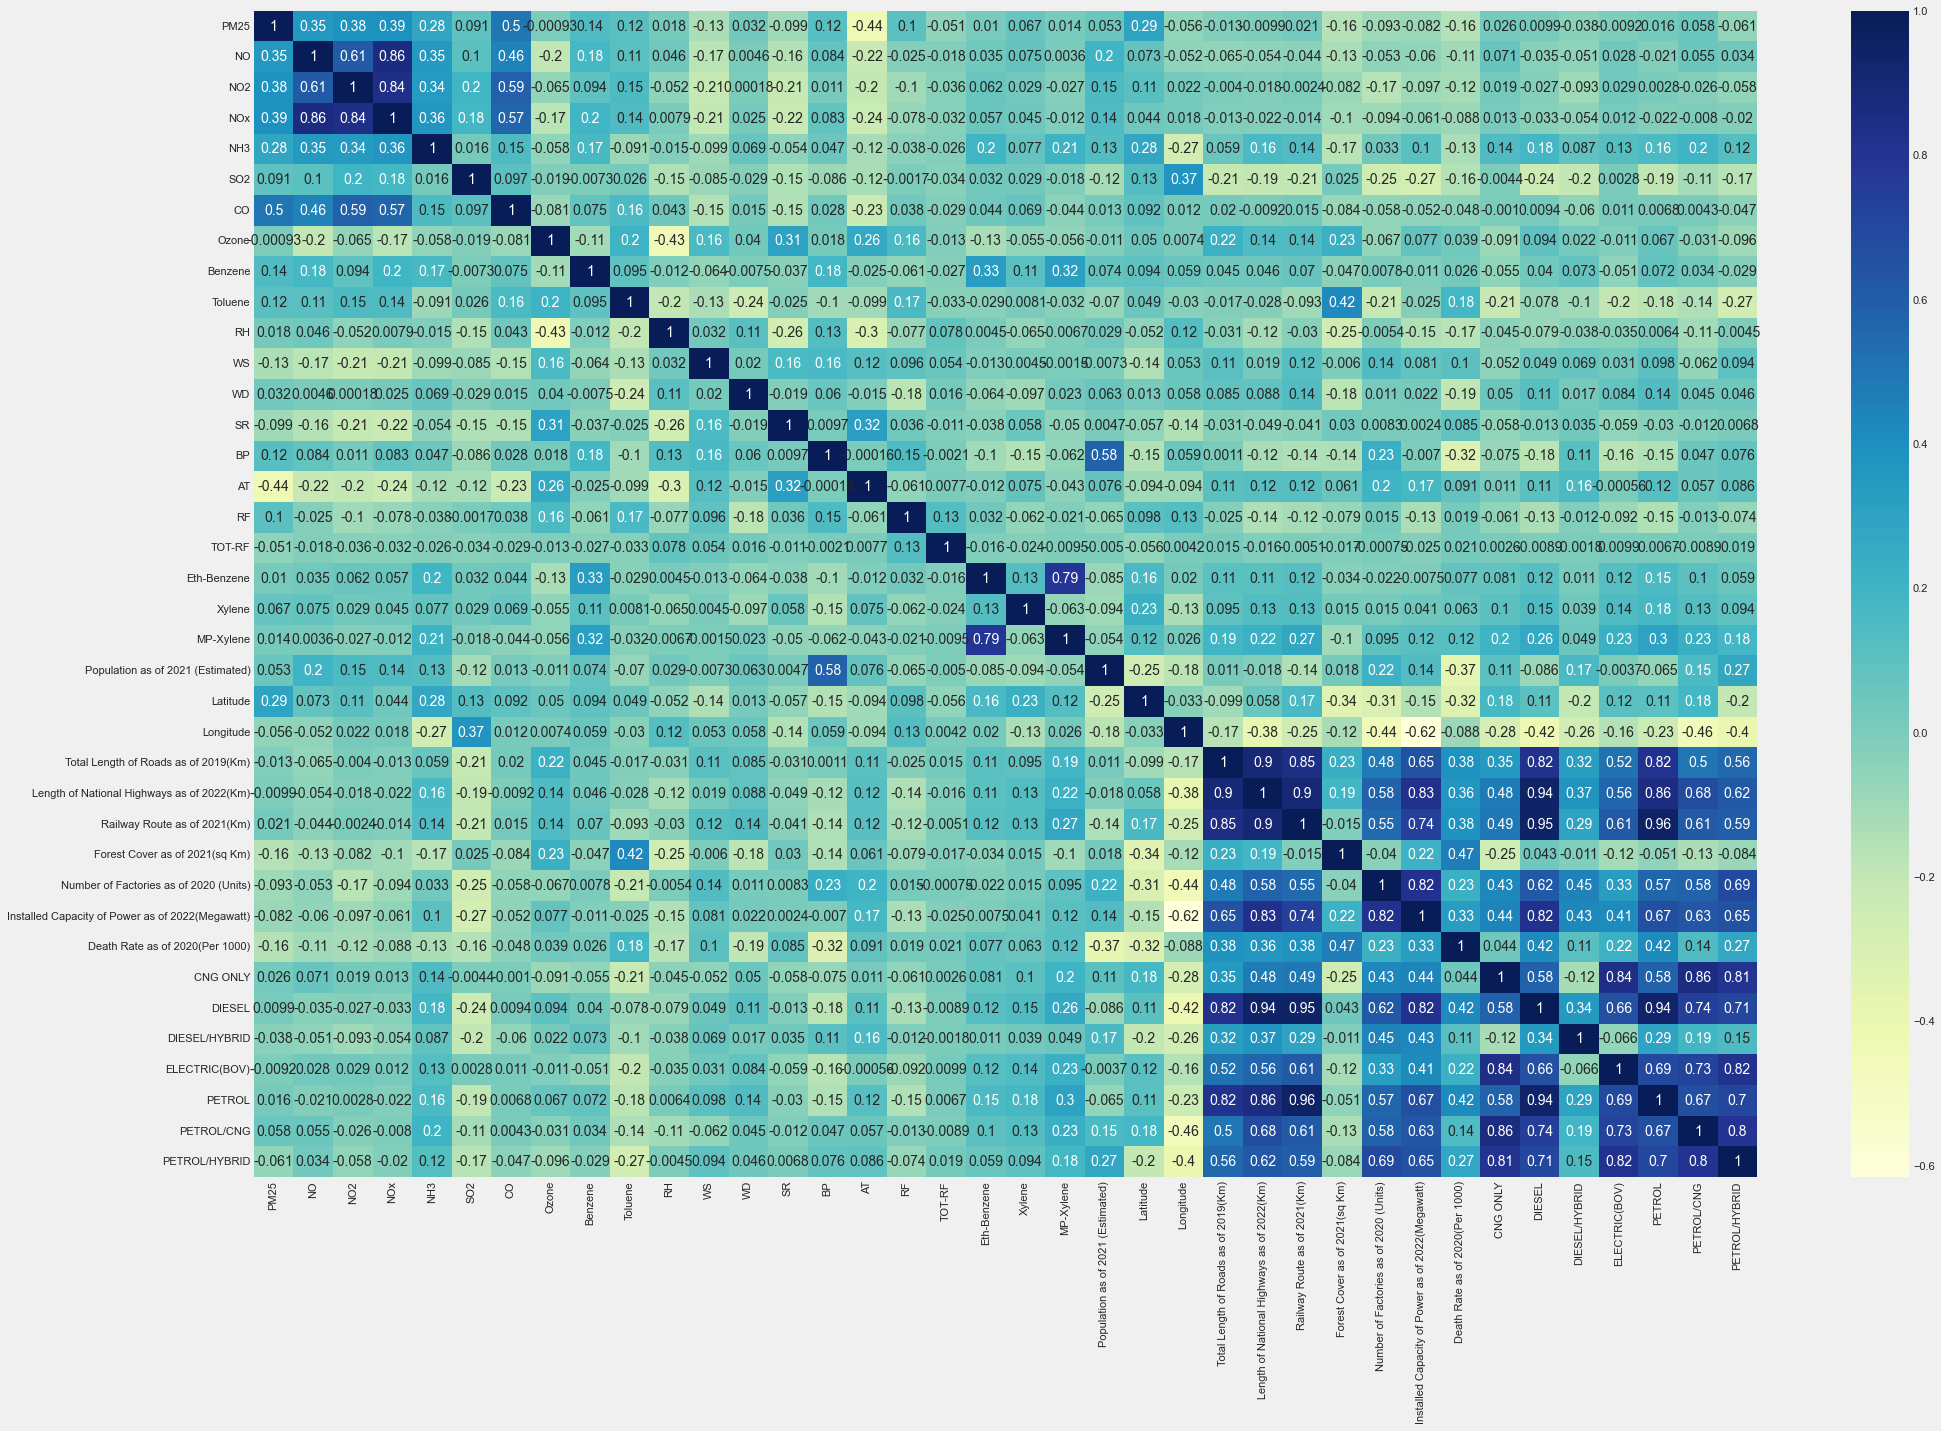

In [24]:
plt.figure(figsize=(30,20))
seaborn.heatmap(df.corr(),cmap='YlGnBu', annot=True)

In [25]:
col = ['CO','NOx','NO2','NO','NH3','AT','City','BP','RF','CNG ONLY','PM25']
df = df.loc[:,col]
df.info

<bound method DataFrame.info of                            CO        NOx        NO2         NO        NH3  \
Time Periods                                                                
2022-06-28 16:00:00  0.435944  11.092480   6.562036   3.739738   9.646401   
2021-12-31 08:00:00  1.429102  43.561582  35.892447   8.619751  13.317605   
2021-12-31 04:00:00  1.538964  53.399690  31.561107  17.942191  12.474360   
2021-12-31 00:00:00  1.701574  48.719249  29.808438  15.716528  12.524403   
2021-12-30 20:00:00  1.617325  51.242682  40.032460  10.621021  12.884656   
...                       ...        ...        ...        ...        ...   
2020-12-30 16:00:00  0.981544  34.287147  68.373472  11.411814  17.716372   
2020-12-30 12:00:00  0.985951  22.895955  46.438853   2.583706  17.716372   
2020-12-30 08:00:00  0.981598  24.477563  51.099361   3.936856  17.716372   
2022-01-01 00:00:00  0.703631  28.289267  23.433032  10.330031  21.678616   
2022-06-30 20:00:00  0.605000  19.528604  21

In [26]:
df.to_csv("df_v1.csv")

In [27]:
df = pd.read_csv('df_v1.csv',
                 index_col=0,
                 parse_dates=[0],
                 date_parser=pd.to_datetime,
                 infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 223584 entries, 2022-06-28 16:00:00 to 2022-06-30 20:00:00
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CO        223584 non-null  float64
 1   NOx       223584 non-null  float64
 2   NO2       223584 non-null  float64
 3   NO        223584 non-null  float64
 4   NH3       223584 non-null  float64
 5   AT        223584 non-null  float64
 6   City      223584 non-null  object 
 7   BP        223584 non-null  float64
 8   RF        223584 non-null  float64
 9   CNG ONLY  223584 non-null  float64
 10  PM25      223584 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.5+ MB


Text(0.5, 1.0, 'Air Quality, 2020-2022')

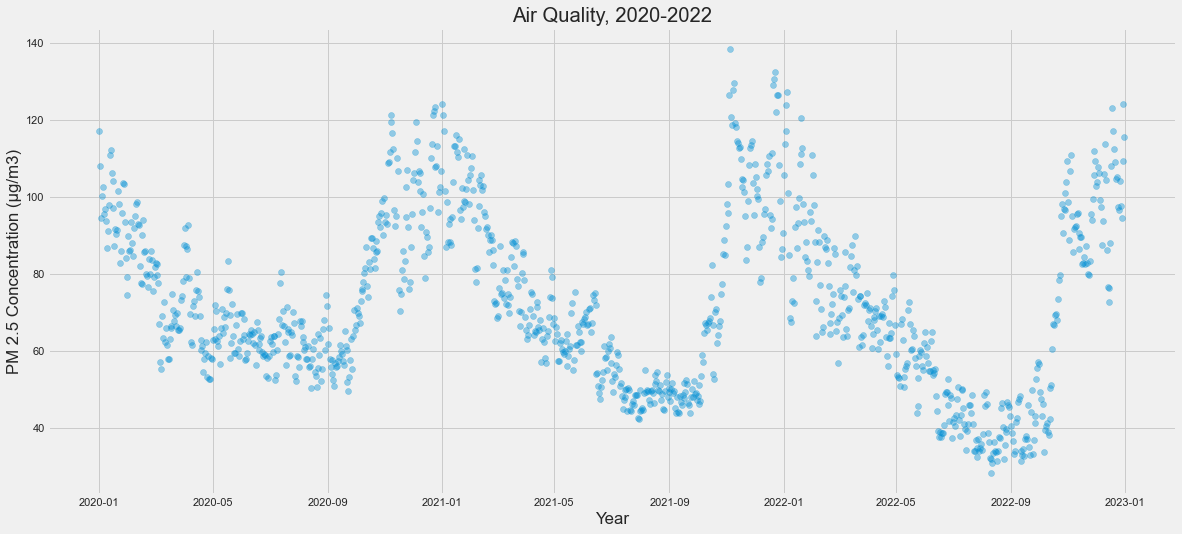

In [28]:
# Generate a simple scatter plot of daily mean PM2.5 concentration for entire time span
scatter_y = df.PM25.resample('D').mean()
scatter_x = df.PM25.resample('D').mean().index
#color = scatter_y

plt.scatter(x = scatter_x, y = scatter_y, alpha = 0.4)
plt.xlabel('Year')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality, 2020-2022')

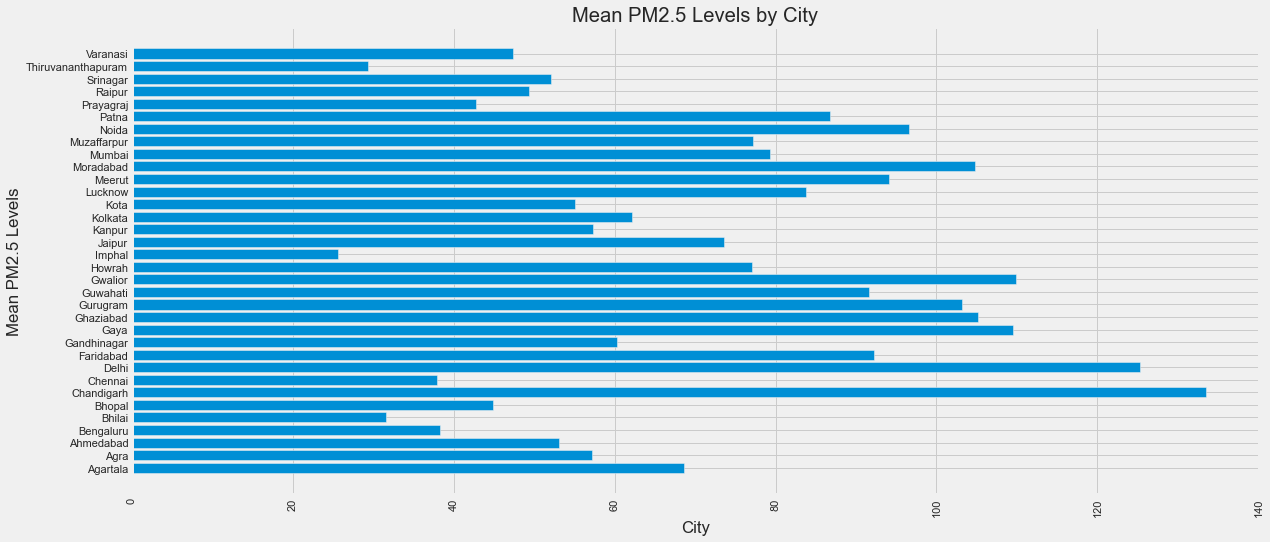

In [29]:
# Plot PM 2.5 level by City
city_pm2 = df.groupby('City')['PM25'].mean()
# Create a bar chart of the mean PM2.5 level for each city
plt.barh(city_pm2.index, city_pm2.values)
plt.xlabel('City')
plt.ylabel('Mean PM2.5 Levels')
plt.title('Mean PM2.5 Levels by City')
plt.xticks(rotation=90)
plt.show()

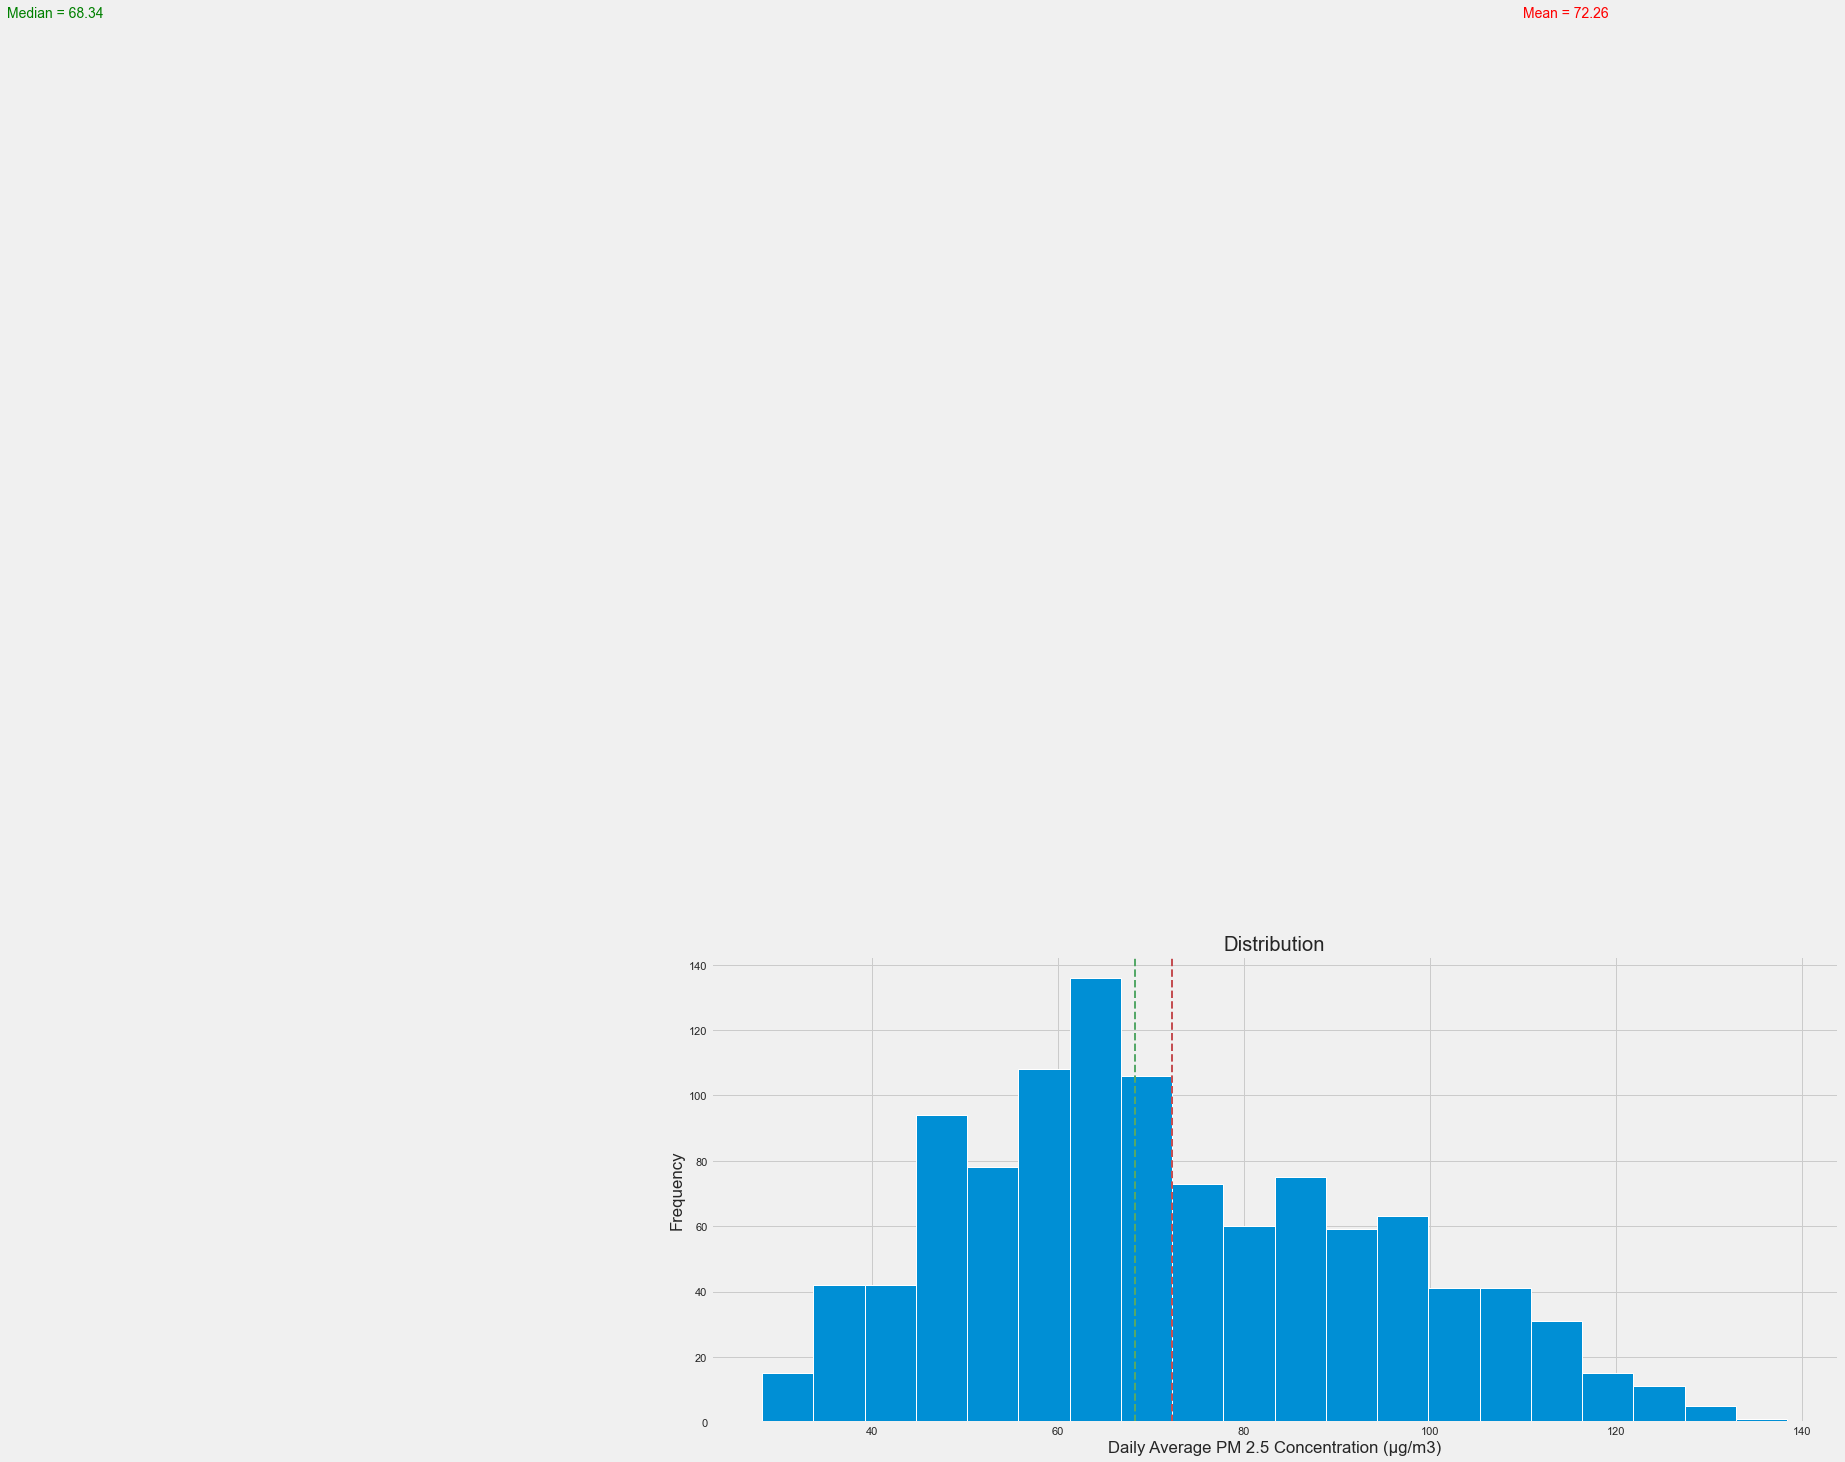

In [30]:
# Distribution of air quality for the period
plt.figure()
plt.hist(scatter_y.dropna(), bins = 20, edgecolor='w', lw=1)
plt.xlabel('Daily Average PM 2.5 Concentration (μg/m3)')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.text(110, 430, 'Mean = ' + str(round(scatter_y.dropna().mean(),2)), color = 'red')
plt.text(-53, 430, 'Median = ' + str(round(scatter_y.dropna().median(),2)), color = 'green')
plt.axvline(scatter_y.dropna().mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(scatter_y.dropna().median(), color='g', linestyle='dashed', linewidth=2)

([<matplotlib.axis.XTick at 0x14187e42910>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

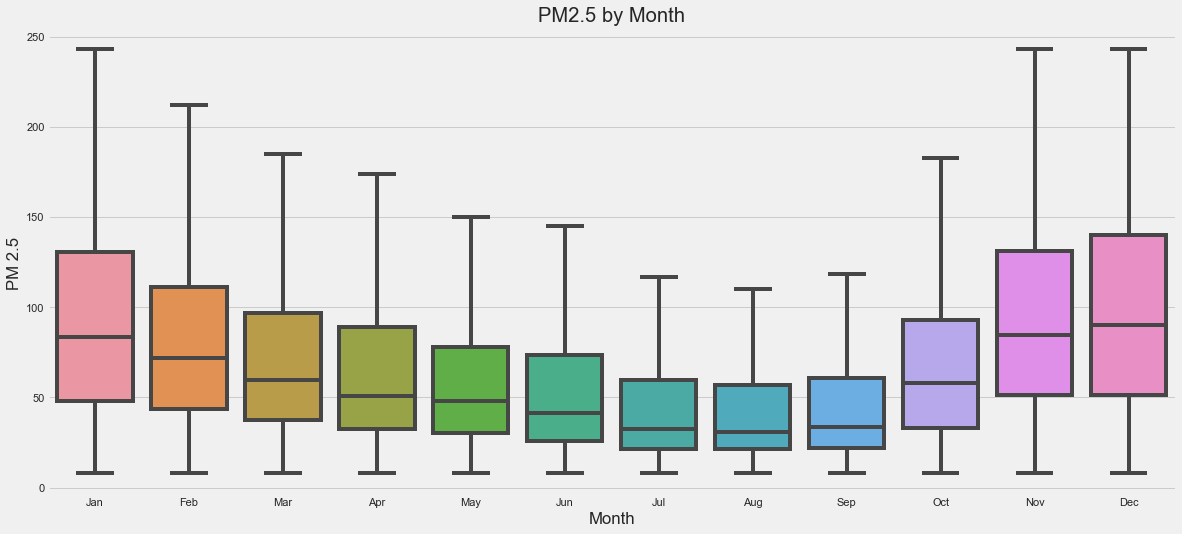

In [31]:
# Plot PM 2.5 level by MONTH
plt.figure()
monthdf = df
monthdf['month'] = df.index.month
sns.boxplot(x="month", y="PM25", data=monthdf, showfliers=False)
plt.xlabel('Month')
plt.ylabel('PM 2.5 ')
plt.title('PM2.5 by Month')
plt.xticks(range(0,12), calendar.month_abbr[1:13])

Text(0.5, 1.0, 'Air Quality vs. NOx')

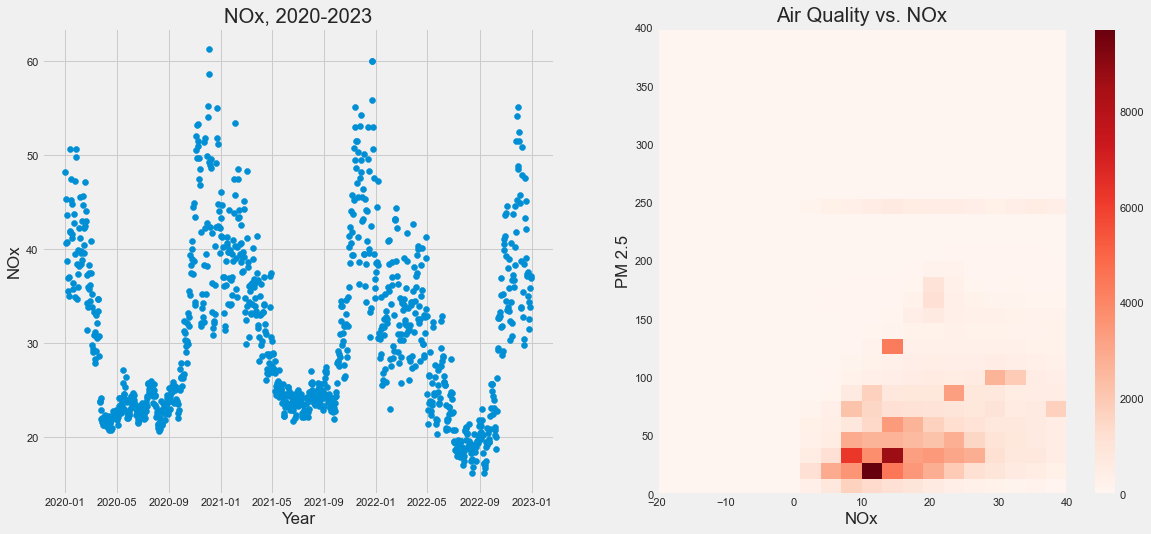

In [32]:
# NOx (others can be added)

plt.figure()
plt.subplot(1,2,1)
plt.scatter(x = df.NOx.resample('D').mean().index, y = df.NOx.resample('D').mean())
plt.xlabel('Year')
plt.ylabel('NOx')
plt.title('NOx, 2020-2023')

plt.subplot(1,2,2)
plt.hist2d(x = df.NOx, y = df.PM25, bins = (20, 30), range = ((-20,40),(0,400)), cmap = 'Reds')
plt.colorbar()
plt.xlabel('NOx')
plt.ylabel('PM 2.5')
plt.title('Air Quality vs. NOx')

## Prediction Model- Prophet

In [33]:
df = pd.read_csv('df_v1.csv',
                 index_col=0,
                 parse_dates=[0],
                 date_parser=pd.to_datetime,
                 infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 223584 entries, 2022-06-28 16:00:00 to 2022-06-30 20:00:00
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CO        223584 non-null  float64
 1   NOx       223584 non-null  float64
 2   NO2       223584 non-null  float64
 3   NO        223584 non-null  float64
 4   NH3       223584 non-null  float64
 5   AT        223584 non-null  float64
 6   City      223584 non-null  object 
 7   BP        223584 non-null  float64
 8   RF        223584 non-null  float64
 9   CNG ONLY  223584 non-null  float64
 10  PM25      223584 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.5+ MB


In [34]:
# Define the columns to use for the forecast
cols_to_use = ['CO','NOx','NO2','NO','NH3','AT','BP','RF','CNG ONLY','PM25']

# Group by city and date
df['ds'] = pd.to_datetime(df.index)
df = df.reset_index().rename(columns={'index': 'City'})
df = df.groupby(['City', pd.Grouper(key='ds', freq='1D')])[cols_to_use].mean().reset_index()

In [35]:
df

,City,ds,CO,NOx,NO2,NO,NH3,AT,BP,RF,CNG ONLY,PM25
0,Agartala,2020-01-01,1.472506,40.882203,35.335907,7.989767,13.828680,24.590000,793.579048,0.000000,1076.0,73.946201
1,Agartala,2020-01-02,1.472506,40.882203,35.335907,7.989767,13.828680,24.590000,793.579048,0.000000,1076.0,73.946201
2,Agartala,2020-01-03,1.472506,40.882203,35.335907,7.989767,13.828680,24.590000,793.579048,0.000000,1076.0,73.946201
3,Agartala,2020-01-04,1.472506,40.882203,35.335907,7.989767,13.828680,24.590000,793.579048,0.000000,1076.0,73.946201
4,Agartala,2020-01-05,1.472506,40.882203,35.335907,7.989767,13.828680,24.590000,793.579048,0.000000,1076.0,73.946201
...,...,...,...,...,...,...,...,...,...,...,...,...
37259,Varanasi,2022-12-27,0.617327,17.984997,23.267230,3.276453,14.545765,16.768995,808.492541,0.000000,47173.0,38.035508
37260,Varanasi,2022-12-28,0.616623,17.478746,23.972005,2.883114,13.497916,15.672800,809.940332,0.000000,47173.0,35.630990
37261,Varanasi,2022-12-29,0.883372,21.032203,25.651386,3.784328,14.885374,15.589929,809.456979,0.000000,47173.0,52.380017
37262,Varanasi,2022-12-30,1.246414,22.638245,27.583108,4.059871,15.681641,15.755324,819.992552,0.000000,47173.0,82.911110


In [36]:
from prophet.plot import add_changepoints_to_plot

In [37]:
grouped = df.rename(columns = {
    'PM25': 'y'
}).groupby(['City']) 

In [38]:
dfs =[]
for g in grouped.groups:
    group = grouped.get_group(g)
    m = Prophet(growth='linear', uncertainty_samples=None, yearly_seasonality=True)
    m.fit(group)
    future = m.make_future_dataframe(periods=30, freq = "4H", include_history = False)
    forecast = m.predict(future)
    #m.plot(forecast, uncertainty = True)
    forecast['City'] = g
    dfs.append(forecast)
final = pd.concat(dfs, ignore_index=True)

11:42:56 - cmdstanpy - INFO - Chain [1] start processing
11:42:57 - cmdstanpy - INFO - Chain [1] done processing
11:42:57 - cmdstanpy - INFO - Chain [1] start processing
11:42:57 - cmdstanpy - INFO - Chain [1] done processing
11:42:57 - cmdstanpy - INFO - Chain [1] start processing
11:42:57 - cmdstanpy - INFO - Chain [1] done processing
11:42:58 - cmdstanpy - INFO - Chain [1] start processing
11:42:58 - cmdstanpy - INFO - Chain [1] done processing
11:42:58 - cmdstanpy - INFO - Chain [1] start processing
11:42:58 - cmdstanpy - INFO - Chain [1] done processing
11:42:58 - cmdstanpy - INFO - Chain [1] start processing
11:42:58 - cmdstanpy - INFO - Chain [1] done processing
11:42:58 - cmdstanpy - INFO - Chain [1] start processing
11:42:59 - cmdstanpy - INFO - Chain [1] done processing
11:42:59 - cmdstanpy - INFO - Chain [1] start processing
11:42:59 - cmdstanpy - INFO - Chain [1] done processing
11:42:59 - cmdstanpy - INFO - Chain [1] start processing
11:42:59 - cmdstanpy - INFO - Chain [1]

In [39]:
final[final['City']=='Agartala']

,ds,trend,additive_terms,weekly,yearly,multiplicative_terms,yhat,City
0,2022-12-31 04:00:00,92.244685,33.525472,0.652900,32.872572,0.0,125.770157,Agartala
1,2022-12-31 08:00:00,92.299277,33.657138,0.717395,32.939743,0.0,125.956415,Agartala
2,2022-12-31 12:00:00,92.353869,33.739548,0.733989,33.005559,0.0,126.093417,Agartala
3,2022-12-31 16:00:00,92.408462,33.760751,0.690730,33.070021,0.0,126.169213,Agartala
4,2022-12-31 20:00:00,92.463054,33.717533,0.584401,33.133133,0.0,126.180587,Agartala
5,2023-01-01 00:00:00,92.517646,33.615960,0.421065,33.194896,0.0,126.133607,Agartala
6,2023-01-01 04:00:00,92.572239,33.470297,0.214984,33.255313,0.0,126.042536,Agartala
7,2023-01-01 08:00:00,92.626831,33.300527,-0.013862,33.314389,0.0,125.927358,Agartala
8,2023-01-01 12:00:00,92.681424,33.128967,-0.243161,33.372128,0.0,125.810391,Agartala
9,2023-01-01 16:00:00,92.736016,32.976621,-0.451912,33.428533,0.0,125.712637,Agartala


In [40]:
result = final.copy()
result = result.rename(columns = {
    'ds' : 'Time Periods',
    'yhat' : 'PM2.5',
})
result = result[['Time Periods', 'City', 'PM2.5']]

In [41]:
result = result[(result['Time Periods'] >= "2023-01-01") & (result['Time Periods'] < "2023-01-04")]

In [42]:
result

,Time Periods,City,PM2.5
5,2023-01-01 00:00:00,Agartala,126.133607
6,2023-01-01 04:00:00,Agartala,126.042536
7,2023-01-01 08:00:00,Agartala,125.927358
8,2023-01-01 12:00:00,Agartala,125.810391
9,2023-01-01 16:00:00,Agartala,125.712637
...,...,...,...
1008,2023-01-03 04:00:00,Varanasi,67.340605
1009,2023-01-03 08:00:00,Varanasi,66.450449
1010,2023-01-03 12:00:00,Varanasi,65.624269
1011,2023-01-03 16:00:00,Varanasi,64.902882


In [43]:
result.to_csv('output.csv')

In [44]:
result.to_csv('PM2.5 prediction')

In [45]:
result.to_csv('PM2.5_final_pred.csv')